# Suman Roy, MDS202041

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#importing necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from skimage.exposure import match_histograms,histogram,cumulative_distribution
from skimage import data, io, filters

## Question 1

### Histogram Equalization


In [7]:
def cdf(img):
    hist,bins = np.histogram(img.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()
    return(cdf_normalized)

def histogram_equalization(img, plot=True):
    hist,bins = np.histogram(img.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * float(hist.max()) / cdf.max()
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    img_ = cdf[img]
    return img_
    

### Intensity Transformation

In [24]:
def plot_intensity_transformation(img, L=256):
  M,N = img.shape
  hist,bins = np.histogram(img.flatten(),256,[0,256])
  cdf = hist.cumsum()
  pks=cdf/(M*N)
  sks = [0]*L
  for i in range(L):
      sks[i] = round((L-1) * pks[i])    
  sks = np.array(sks, dtype = np.uint8)
  plt.plot(np.arange(L), sks)
  plt.xlabel("Original Intensity")
  plt.ylabel("Transformed Intensity")
  plt.title("Intensity transformation plot")
  plt.show()



### Taking the imaes as Input

In [18]:
chestxray_img = cv2.imread('/content/drive/MyDrive/CMI/Semester 4/Computer Vision/Assignment 4/chestxray1.png',0)
hawkesbay_img = cv2.imread('/content/drive/MyDrive/CMI/Semester 4/Computer Vision/Assignment 4/HawkesBay.jpg',0)

In [21]:
chestxray_img2=histogram_equalization(chestxray_img)
hawkesbay_img2=histogram_equalization(hawkesbay_img)

### Chestxray Image

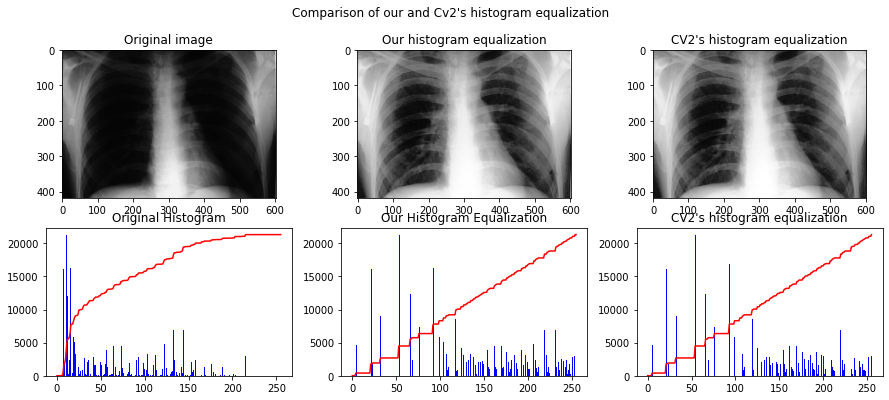

In [22]:
fig, axs = plt.subplots(2,3, figsize = (15,6))
axs[0,0].imshow(chestxray_img, cmap = 'gray')
axs[0,0].set_title("Original image")

axs[0,1].imshow(chestxray_img2, cmap = 'gray')
axs[0,1].set_title("Our histogram equalization")

axs[0,2].imshow(cv2.equalizeHist(chestxray_img), cmap = 'gray')
axs[0,2].set_title("CV2's histogram equalization")

axs[1,0].hist(chestxray_img.flatten(),256,color='blue')
axs[1,0].plot(cdf(chestxray_img),color='red')
axs[1,0].set_title("Original Histogram")

axs[1,1].hist(chestxray_img2.flatten(),256,color='blue')
axs[1,1].plot(cdf(chestxray_img2),color='red')
axs[1,1].set_title("Our Histogram Equalization")

axs[1,2].hist(cv2.equalizeHist(chestxray_img).flatten(),256,color='blue')
axs[1,2].plot(cdf(cv2.equalizeHist(chestxray_img)),color='red')
axs[1,2].set_title("CV2's histogram equalization")

plt.suptitle("Comparison of our and Cv2's histogram equalization")
plt.show()

Intensity Transformation

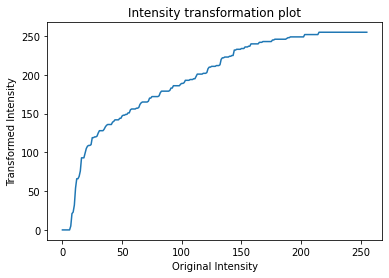

In [26]:
plot_intensity_transformation(chestxray_img, L=256)

### Hawkesbay Image

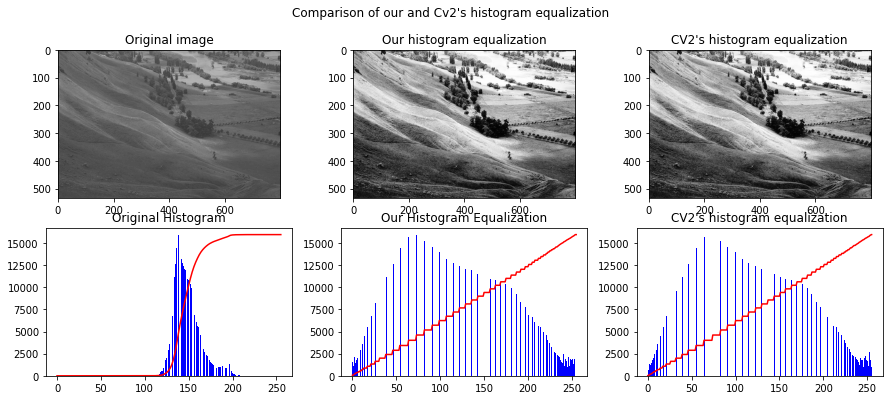

In [23]:
fig, axs = plt.subplots(2,3, figsize = (15,6))
axs[0,0].imshow(hawkesbay_img, cmap = 'gray')
axs[0,0].set_title("Original image")

axs[0,1].imshow(hawkesbay_img2, cmap = 'gray')
axs[0,1].set_title("Our histogram equalization")

axs[0,2].imshow(cv2.equalizeHist(hawkesbay_img), cmap = 'gray')
axs[0,2].set_title("CV2's histogram equalization")

axs[1,0].hist(hawkesbay_img.flatten(),256,color='blue')
axs[1,0].plot(cdf(hawkesbay_img),color='red')
axs[1,0].set_title("Original Histogram")

axs[1,1].hist(hawkesbay_img2.flatten(),256,color='blue')
axs[1,1].plot(cdf(hawkesbay_img2),color='red')
axs[1,1].set_title("Our Histogram Equalization")

axs[1,2].hist(cv2.equalizeHist(hawkesbay_img).flatten(),256,color='blue')
axs[1,2].plot(cdf(cv2.equalizeHist(hawkesbay_img)),color='red')
axs[1,2].set_title("CV2's histogram equalization")

plt.suptitle("Comparison of our and Cv2's histogram equalization")
plt.show()

Intensity Transformation

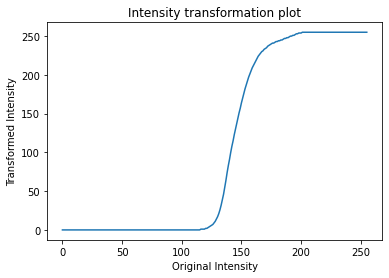

In [25]:
plot_intensity_transformation(hawkesbay_img, L=256)

## Question 2

### Taking the images as input

In [27]:
image1 = cv2.imread('/content/drive/MyDrive/CMI/Semester 4/Computer Vision/Assignment 4/image1.jpg',1)
image2 = cv2.imread('/content/drive/MyDrive/CMI/Semester 4/Computer Vision/Assignment 4/image2.jpg',1)

In [28]:
image1 = cv2.cvtColor(image1 , cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2 , cv2.COLOR_BGR2RGB)

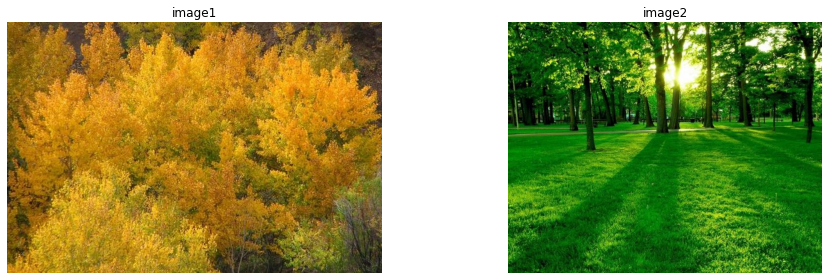

In [29]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

for axis in (ax1, ax2):
    axis.set_axis_off()
    
ax1.imshow(image1)
ax1.set_title('image1')
ax2.imshow(image2)
ax2.set_title('image2')

plt.tight_layout()
plt.show()

### (a) Extracting the color channels

In [30]:
R1, G1, B1 = cv2.split(image1)
R2, G2, B2 = cv2.split(image2)

image1

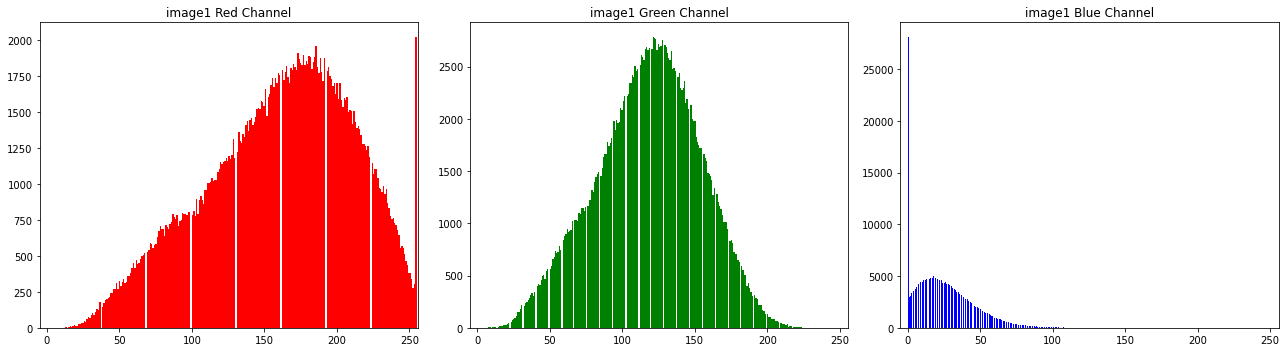

In [48]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))


ax1.hist(R1.flatten(),256,color = 'r')
ax1.set_xlim([-5,256])
ax1.set_title('image1 Red Channel')
ax2.hist(G1.flatten(),256, color = 'g')
ax2.set_xlim([-5,256])
ax2.set_title('image1 Green Channel')
ax3.hist(B1.flatten(),256, color = 'b')
ax3.set_xlim([-5,256])
ax3.set_title('image1 Blue Channel')




plt.tight_layout()
plt.show()

image2

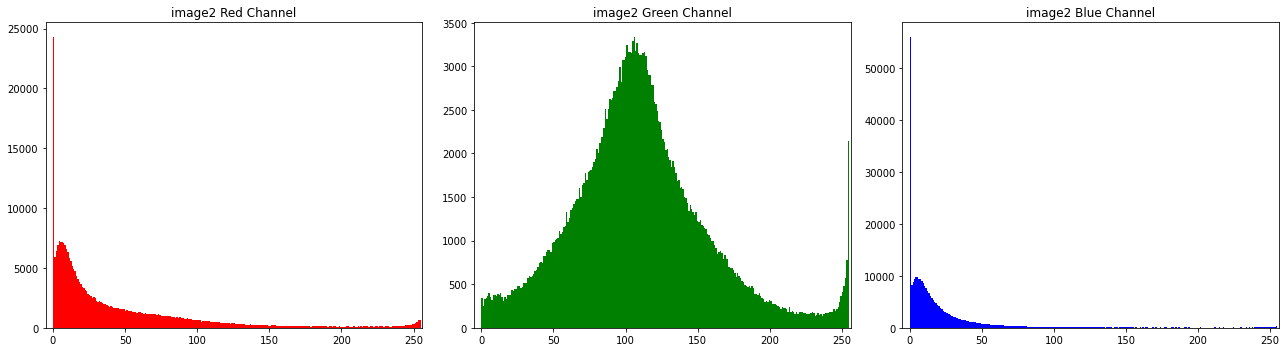

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))


ax1.hist(R2.flatten(),256,color = 'r')
ax1.set_xlim([-5,256])
ax1.set_title('image2 Red Channel')
ax2.hist(G2.flatten(),256, color = 'g')
ax2.set_xlim([-5,256])
ax2.set_title('image2 Green Channel')
ax3.hist(B2.flatten(),256, color = 'b')
ax3.set_xlim([-5,256])
ax3.set_title('image2 Blue Channel')



plt.tight_layout()
plt.show()

### (b) Matching of Histogram of each channel

In [62]:
def histogram(img,L=256):
  hist = [0]*L
  M,N = img.shape
  for i in range(M):
      for j in range(N):
          value = img[i,j]
          hist[value] = hist[value] + 1          
  return hist

def cumuluative_histogram(hist,L=256):
  cum_hist = [0]*L
  for i in range(L):
      if i==0:
          cum_hist[i] = hist[i]
      else:
          cum_hist[i] = cum_hist[i-1] + hist[i]
          
  return np.array(cum_hist)

def PKS(cumuluative_histogram, M, N):
    #return the probability of each intensity value
    return (cumuluative_histogram/(M*N))

def SKS(pks, L = 256):
    #return the new histogram intensity map for the old intensity values
    sks = [0]*L
    for i in range(L):
        sks[i] = round((L-1) * pks[i])   
    sks = np.array(sks, dtype = np.uint8)
    return sks

def get_match_map(sks, Gzks, L = 256):
    #intensity mapping from rk to zk given the histogram equalized sks and Gzks as inputs
    match_map = [0] * L    
    G_inv_map = {}
    for i in range(L):
        zk = i
        Gzk = Gzks[i]
        if Gzk not in G_inv_map:
            G_inv_map[Gzk] = zk        
    #setting map of all inverse values which are not present in Gzk as the next available Gzk inverse
    for i in range(L):
        if i not in G_inv_map:
            j = i+1
            while j not in G_inv_map:
                j = j + 1            
            G_inv_map[i] = G_inv_map[j]            
    #map from rk to zk
    for i in range(L):
        sk = sks[i]
        match_map[i] = G_inv_map[sk]        
    return match_map

def hist_matching(hist1, hist2, M1 = 8, M2 = 8, N1 = 8, N2 = 8, L = 8):
    #find the histogram matching between two histograms 
    cum_hist1 = cumuluative_histogram(hist1, L)
    pks1 = PKS(cum_hist1,  M1, N1)
    sks1 = SKS(pks1, L)
    
    cum_hist2 = cumuluative_histogram(hist2, L)
    pks2 = PKS(cum_hist2, M2, N2)
    Gzks = SKS(pks2, L)
    
    match_map = get_match_map(sks1, Gzks, L)
    
    return match_map

def apply_match(img, hist_map, M, N):
    #apply histogram matching to a given image with the histogram matching map as input 
    img2 = np.zeros((M,N))
    for i in range(M):
        for j in range(N):
            rk = img[i,j]
            zk = hist_map[rk]
            img2[i,j] = zk            
    return img2



In [63]:
hist_blue1 = histogram(B1)
hist_blue2 = histogram(B2)

hist_green1 =histogram(G1)
hist_green2 = histogram(G2)

hist_red1 = histogram(R1)
hist_red2 = histogram(R2)

M1, N1 = B1.shape
M2, N2 = B2.shape

#histogram matching of blue channels of image 1 and image2
map_blue = hist_matching(hist_blue1, hist_blue2, M1, M2, N1, N2, L = 256)
#histogram matching of green channels of image 1 and image2
map_green = hist_matching(hist_green1, hist_green2, M1, M2, N1, N2, L = 256)
#histogram matching of red channels of image 1 and image2
map_red = hist_matching(hist_red1, hist_red2, M1, M2, N1, N2, L = 256)

blue_new = apply_match(B1, map_blue, M1, N1)
green_new = apply_match(G1, map_green, M1, N1)
red_new = apply_match(R1, map_red, M1, N1)


### (c) Reconstructing image1 in colour

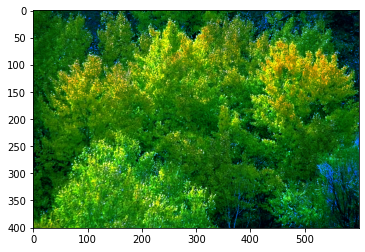

In [64]:
new_img = cv2.merge((blue_new, green_new, red_new))
new_img = new_img.astype('uint8')
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.show()

### (d) Comparing results with original images

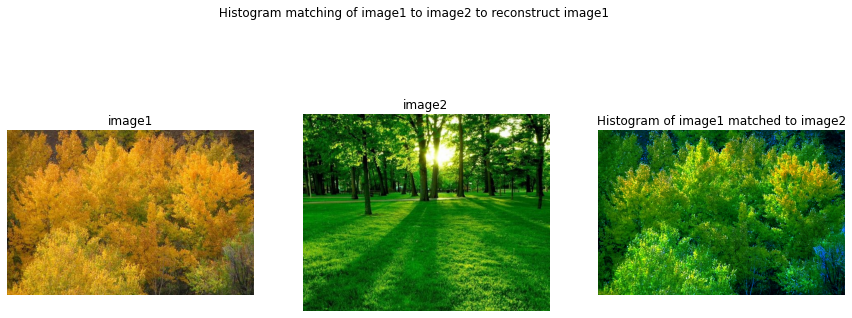

In [67]:
fig, axs = plt.subplots(1,3,figsize= (15, 6))

for axis in axs:
    axis.set_axis_off()

axs[0].imshow(image1)
axs[0].set_title("image1")

axs[1].imshow(image2)
axs[1].set_title("image2")

axs[2].imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
axs[2].set_title("Histogram of image1 matched to image2")

plt.suptitle(" Histogram matching of image1 to image2 to reconstruct image1")
plt.show()

## Question 3

In [69]:
crayons = cv2.imread('/content/drive/MyDrive/CMI/Semester 4/Computer Vision/Assignment 4/crayons.jpg',1)
crayons_RGB = cv2.cvtColor(crayons , cv2.COLOR_BGR2RGB)

### (a) Applying histogram equalization to the 3 color channels (R, G, B) separately and recombining

In [71]:
R, G, B = cv2.split(crayons_RGB)
crayons_output = cv2.merge((cv2.equalizeHist(R), cv2.equalizeHist(G), cv2.equalizeHist(B)))
cv2.imwrite('/content/drive/MyDrive/CMI/Semester 4/Computer Vision/Assignment 4/crayons_output.jpg', crayons_output)

True

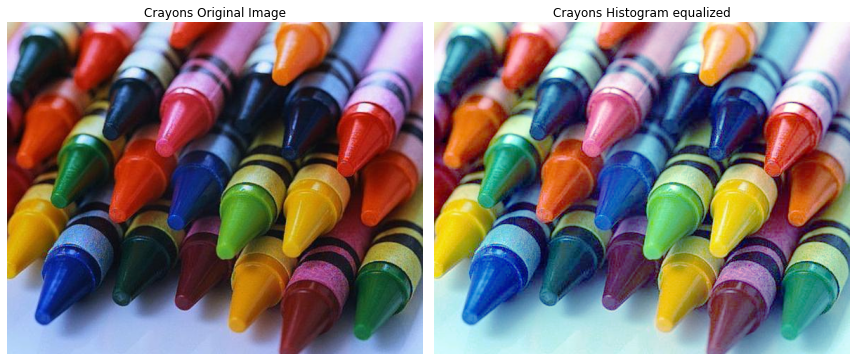

In [73]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

for axis in (ax1, ax2):
    axis.set_axis_off()
    
ax1.imshow(crayons_RGB)
ax1.set_title('Crayons Original Image')
ax2.imshow(crayons_output)
ax2.set_title('Crayons Histogram equalized')

plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

### (b) Converting Crayons image to HSV and applying Histogram Equalization to the channel V

In [74]:
crayons_HSV = cv2.cvtColor(crayons , cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(crayons_HSV)
crayons_HSV_output = cv2.merge((H, S, cv2.equalizeHist(V)))
crayons_HSV_new_RGB = cv2.cvtColor(crayons_HSV_output , cv2.COLOR_HSV2RGB)

### (c) Difference between the output images

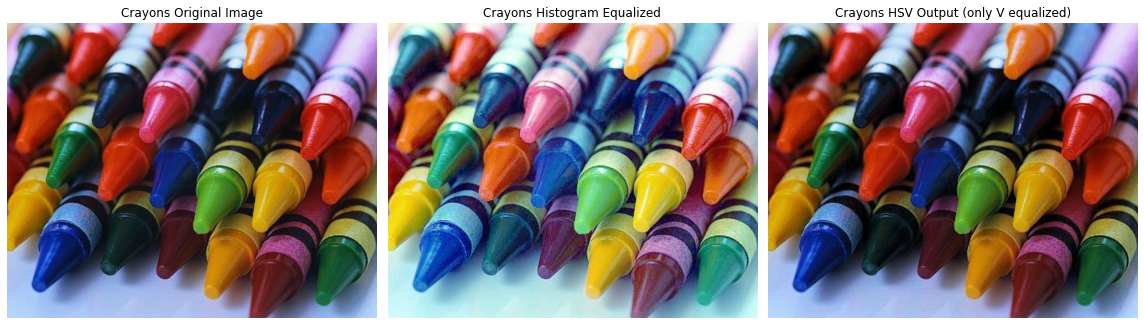

In [76]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 8),sharex=True, sharey=True)

for axis in (ax1, ax2, ax3):
    axis.set_axis_off()

ax1.imshow(crayons_RGB)
ax1.set_title('Crayons Original Image')
ax2.imshow(crayons_output)
ax2.set_title('Crayons Histogram Equalized')
ax3.imshow(crayons_HSV_new_RGB)
ax3.set_title('Crayons HSV Output (only V equalized)')


plt.tight_layout()
plt.show()

## Question 4

In [85]:
#reading grayscale image "Astronaut" from skimage data repository
from skimage import data
from skimage.color import rgb2gray

original = data.moon()
img = rgb2gray(original)
img.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  


(512, 512)

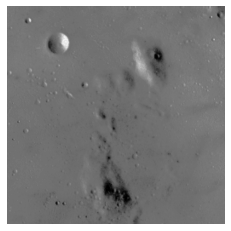

In [86]:
plt.imshow(img, cmap ='gray')
plt.axis('off')
plt.show()

### (a) Choosing neighbourhood size k × k

In [87]:
M,N = img.shape
k = int(input("Enter value of k for window size k*k:"))


Enter value of k for window size k*k:5


### (b) SWAHE

In [91]:
def adaptive_hist_eq(img, k, m, n, stride):
    y_offset = 0
    flag = 0
    img_ahe = img.copy()
    while (y_offset + k)<=n:
        x_offset = 0
        while (x_offset + k) <= m:
            t = img_ahe[x_offset:x_offset + k, y_offset: y_offset + k]
            t_new = cv2.equalizeHist(t)
            img_ahe[x_offset:x_offset+k, y_offset:y_offset+k] = t_new
            x_offset +=stride
            flag+=1
        y_offset +=stride
    return(img_ahe)
img_out = adaptive_hist_eq(img, k, M, N, stride = 1)

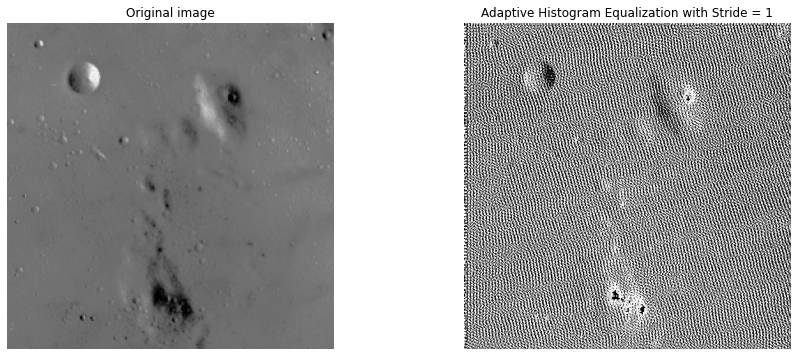

In [93]:
fig,axs = plt.subplots(1,2, figsize = (15,6))
for axis in axs:
    axis.set_axis_off()
axs[0].imshow(img, cmap='gray')
axs[0].set_title("Original image")


axs[1].imshow(img_out, cmap='gray')
axs[1].set_title("Adaptive Histogram Equalization with Stride = 1")

plt.show()

### (c) Breaking into blocks and tiles and Histogram Equalization

In [94]:
M,N = img.shape
block_size = 64
M_block = M // block_size
N_block = N // block_size

In [96]:
def block_hist(img,m,n,block_size):
    block_no = 0
    img_block_hist  = np.zeros((m,n))
    for i in range(0,m,block_size):
        for j in range(0,n, block_size):
            block = img[i:(i + block_size), j:(j + block_size)].copy()
            he = cv2.equalizeHist(block)
            img_block_hist[i:(i + block_size), j:(j + block_size)] = he 
            block_no += 1
    return(img_block_hist)
img_block_hist = block_hist(img, M,N, block_size)

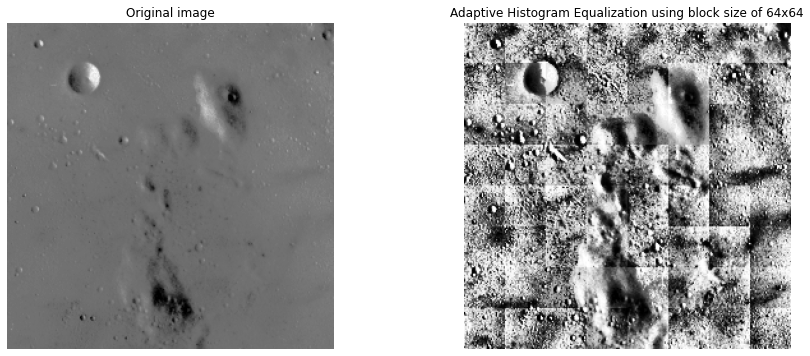

In [98]:
fig,axs = plt.subplots(1,2, figsize = (15,6))

for axis in axs:
    axis.set_axis_off()

axs[0].imshow(img, cmap='gray')
axs[0].set_title("Original image")


axs[1].imshow(img_block_hist, cmap='gray')
axs[1].set_title("Adaptive Histogram Equalization using block size of {}x{}".format(block_size, block_size))

plt.show()

### (d) CLAHE

In [103]:
clahe = cv2.createCLAHE(clipLimit = 0, tileGridSize=(16,16))
img_clahe_0 = clahe.apply(img)

clahe = cv2.createCLAHE(clipLimit = 0.5, tileGridSize=(16,16))
img_clahe_half = clahe.apply(img)

clahe = cv2.createCLAHE(clipLimit = 1, tileGridSize=(16,16))
img_clahe_1 = clahe.apply(img)

clahe = cv2.createCLAHE(clipLimit = 2, tileGridSize=(16,16))
img_clahe_2 = clahe.apply(img)

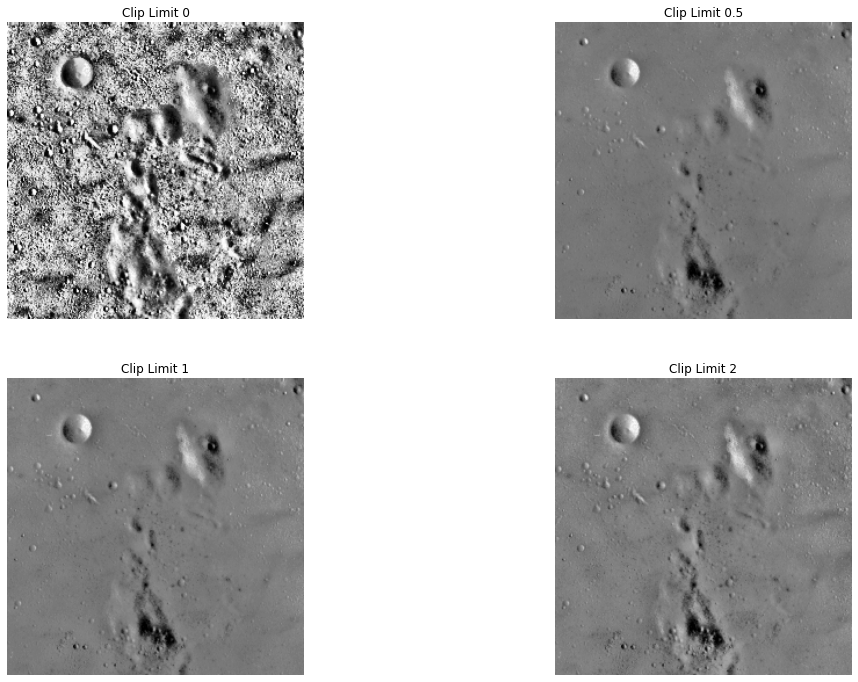

In [104]:
fig,axs = plt.subplots(2,2, figsize = (18,12))

axs[0,0].imshow(img_clahe_0, cmap='gray')
axs[0,0].set_title("Clip Limit 0")
axs[0,0].set_axis_off()

axs[0,1].imshow(img_clahe_half, cmap='gray')
axs[0,1].set_title("Clip Limit 0.5")
axs[0,1].set_axis_off()

axs[1,0].imshow(img_clahe_1, cmap='gray')
axs[1,0].set_title("Clip Limit 1")
axs[1,0].set_axis_off()

axs[1,1].imshow(img_clahe_2, cmap='gray')
axs[1,1].set_title("Clip Limit 2")
axs[1,1].set_axis_off()
plt.show()

### Comparing the Results

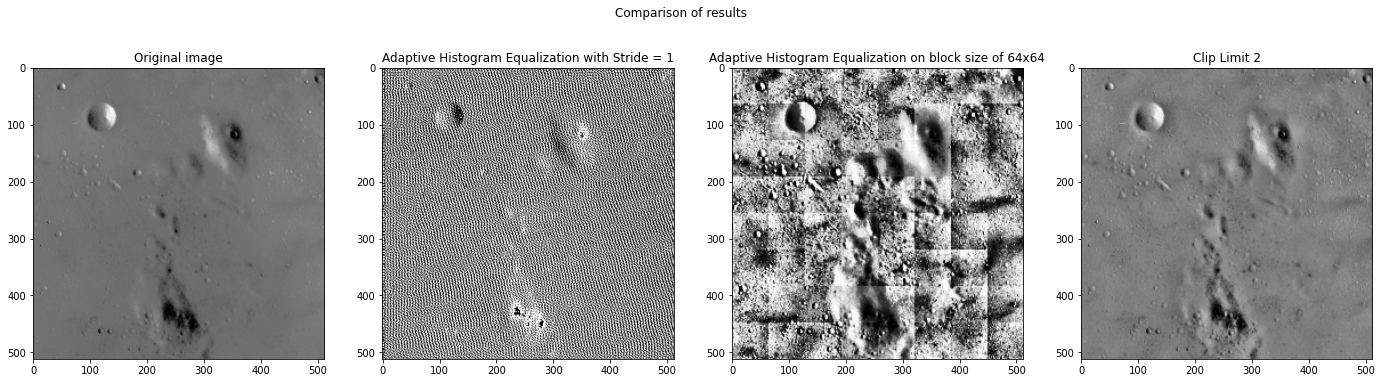

In [106]:
fig,axs = plt.subplots(1,4, figsize = (24,6))

axs[0].imshow(img, cmap='gray')
axs[0].set_title("Original image")

axs[1].imshow(img_out, cmap='gray')
axs[1].set_title("Adaptive Histogram Equalization with Stride = 1")

axs[2].imshow(img_block_hist, cmap='gray')
axs[2].set_title("Adaptive Histogram Equalization on block size of {}x{}".format(block_size, block_size))


axs[3].imshow(img_clahe_2, cmap='gray')
axs[3].set_title("Clip Limit 2")

plt.suptitle("Comparison of results")
plt.show()

## Question 5

I am using the 'Moon' image used in question 4 for this question also. 

In [107]:
def highlight(img, slice_range):
    m,n = img.shape
    img_w_bg = np.zeros((m,n))
    img_wo_bg = np.zeros((m,n))
    
    for i in range(m):
        for j in range(n):
            if slice_range[0] <= img[i,j] <= slice_range[1]:
                img_w_bg[i,j] = 255
                img_wo_bg[i,j] = 255
            else:
                img_w_bg[i,j] = 0
                img_wo_bg[i,j] = img[i,j]
                
    return(img_w_bg, img_wo_bg)

In [115]:
slice_range = (120,120)
img_w_bg, img_wo_bg = highlight(img, slice_range)

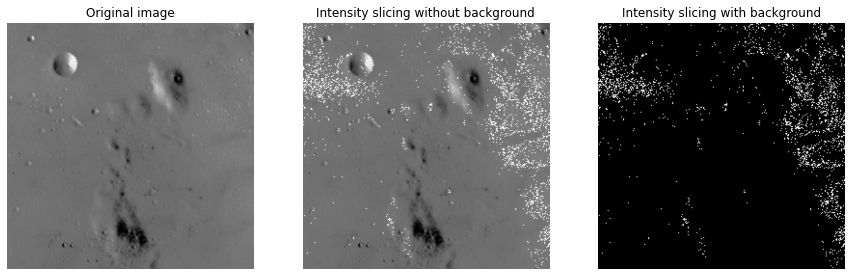

In [116]:
fig,axs = plt.subplots(1,3 , figsize = (15,6))
for axis in axs:
    axis.set_axis_off()
axs[0].imshow(img,cmap = 'gray')
axs[0].set_title("Original image")

axs[1].imshow(img_wo_bg, cmap = 'gray')
axs[1].set_title("Intensity slicing without background")

axs[2].imshow(img_w_bg, cmap = 'gray')
axs[2].set_title("Intensity slicing with background")

plt.show()

## Question 6

In [117]:
img_bin = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
         img_bin.append(np.binary_repr(img[i][j] ,width=8))

### Bit Plane Slicing

In [118]:
bitplane7 = (np.array([int(i[0]) for i in img_bin],dtype = np.uint8) * 128).reshape(img.shape[0],img.shape[1])
bitplane6 = (np.array([int(i[1]) for i in img_bin],dtype = np.uint8) * 64).reshape(img.shape[0],img.shape[1])
bitplane5 = (np.array([int(i[2]) for i in img_bin],dtype = np.uint8) * 32).reshape(img.shape[0],img.shape[1])
bitplane4 = (np.array([int(i[3]) for i in img_bin],dtype = np.uint8) * 16).reshape(img.shape[0],img.shape[1])
bitplane3 = (np.array([int(i[4]) for i in img_bin],dtype = np.uint8) * 8).reshape(img.shape[0],img.shape[1])
bitplane2 = (np.array([int(i[5]) for i in img_bin],dtype = np.uint8) * 4).reshape(img.shape[0],img.shape[1])
bitplane1 = (np.array([int(i[6]) for i in img_bin],dtype = np.uint8) * 2).reshape(img.shape[0],img.shape[1])
bitplane0 = (np.array([int(i[7]) for i in img_bin],dtype = np.uint8) * 1).reshape(img.shape[0],img.shape[1])

### Reconstructing the image

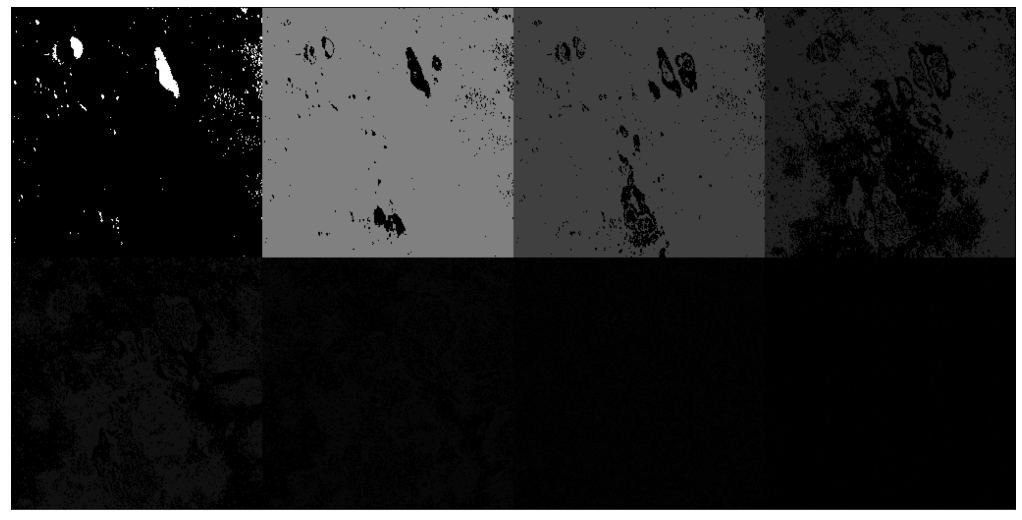

In [119]:
finalr = cv2.hconcat([bitplane7,bitplane6,bitplane5,bitplane4])
finalv =cv2.hconcat([bitplane3,bitplane2,bitplane1,bitplane0])
 
final = cv2.vconcat([finalr,finalv])

fig = plt.figure(figsize=(18, 18))
plt.imshow(final, cmap='gray')
plt.xticks([]), plt.yticks([]) 
plt.title('')
plt.show()

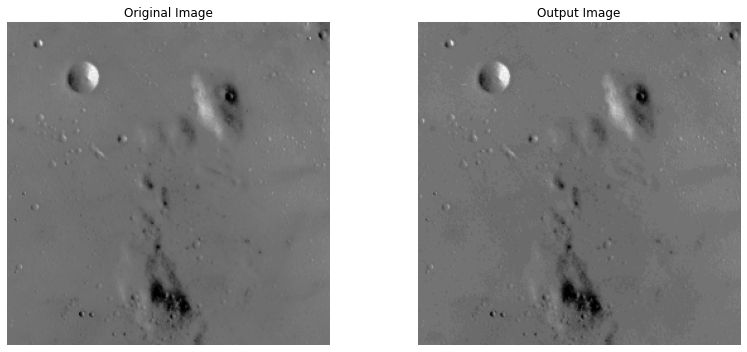

In [121]:
img_new = bitplane7 + bitplane6 + bitplane5 + bitplane4 + bitplane3 

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

for axis in (ax1, ax2):
    axis.set_axis_off()

ax1.imshow(img,cmap='gray')
ax1.set_title('Original Image')
ax2.imshow(img_new,cmap='gray')
ax2.set_title('Output Image')

plt.tight_layout()
plt.show()

Here we have used fewer bitplanes (bitplane 3 to 7) to reconstruct the image